In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

diabetes_df = pd.read_csv('diabetes_dataset__2019.csv')
diabetes_clean_df = pd.read_csv('diabetes_clean_df.csv')
diab_df = pd.read_csv('diab_clean.csv')
not_diab_df = pd.read_csv('not_diab_clean.csv')

# 1. Explore the dataset# 

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
diabetes_df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [ ]:
diabetes_df.corr()

,BMI,Sleep,SoundSleep,Pregancies
BMI,1.000000,-0.067896,-0.298074,-0.045124
Sleep,-0.067896,1.000000,0.534686,0.041959
SoundSleep,-0.298074,0.534686,1.000000,0.150531
Pregancies,-0.045124,0.041959,0.150531,1.000000


In [ ]:
diabetes_df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [ ]:
for col in diabetes_df.columns:
    print(col)
    print(diabetes_df[col].value_counts())
    print("\n")

Age
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64


Gender
Male      580
Female    372
Name: Gender, dtype: int64


Family_Diabetes
no     498
yes    454
Name: Family_Diabetes, dtype: int64


highBP
no     724
yes    228
Name: highBP, dtype: int64


PhysicallyActive
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64


BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64


Smoking
no     844
yes    108
Name: Smoking, dtype: int64


Alcohol
no     760
yes    192
Name: Alcohol, dtype: int64


Sleep
7     264
8     256
6     256
5      68
9      48
4     

In [ ]:
diabetes_df['Gender'].replace('Male','0', inplace=True)
diabetes_df['Gender'].replace('Female','1', inplace=True)
diabetes_df.head(15)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,0,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,0,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,0,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,0,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,0,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
5,40-49,0,no,yes,none,21.0,no,yes,10,10,no,occasionally,sometimes,high,0.0,0,not much,yes
6,less than 40,0,no,no,one hr or more,24.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
7,less than 40,0,no,no,less than half an hr,20.0,no,no,7,7,yes,occasionally,sometimes,low,0.0,0,not much,no
8,40-49,0,yes,no,one hr or more,23.0,no,no,7,7,no,occasionally,sometimes,normal,0.0,0,not much,no
9,less than 40,0,no,no,more than half an hr,20.0,no,no,8,8,o,occasionally,sometimes,normal,0.0,0,not much,no


In [ ]:
# Replacing in col 'Family_Diabetes' no with 0
diabetes_df['Family_Diabetes'].replace('no','0', inplace=True)
# Replacing in col 'Family_Diabetes' yes with 1
diabetes_df['Family_Diabetes'].replace('yes','1', inplace=True)
diabetes_df.head(9)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,0,0,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,0,0,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,0,0,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,0,0,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,0,0,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
5,40-49,0,0,yes,none,21.0,no,yes,10,10,no,occasionally,sometimes,high,0.0,0,not much,yes
6,less than 40,0,0,no,one hr or more,24.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
7,less than 40,0,0,no,less than half an hr,20.0,no,no,7,7,yes,occasionally,sometimes,low,0.0,0,not much,no
8,40-49,0,1,no,one hr or more,23.0,no,no,7,7,no,occasionally,sometimes,normal,0.0,0,not much,no


In [ ]:
# Replacing in col 'highBP' no with 0
diabetes_df['highBP'].replace('no','0', inplace=True)
# Replacing in col 'highBP' yes with 1
diabetes_df['highBP'].replace('yes','1', inplace=True)
diabetes_df.head(5)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,0,0,1,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,0,0,1,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,0,0,0,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,0,0,0,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,0,0,0,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [ ]:
for col in diabetes_df.columns:
    print(col)
    print(diabetes_df[col].value_counts())
    print("\n")

Age
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64


Gender
0    580
1    372
Name: Gender, dtype: int64


Family_Diabetes
0    498
1    454
Name: Family_Diabetes, dtype: int64


highBP
0    724
1    228
Name: highBP, dtype: int64


PhysicallyActive
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64


BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64


Smoking
no     844
yes    108
Name: Smoking, dtype: int64


Alcohol
no     760
yes    192
Name: Alcohol, dtype: int64


Sleep
7     264
8     256
6     256
5      68
9      48
4      32
10     24
11  

In [ ]:
diabetes_df.corr()

,BMI,Sleep,SoundSleep,Pregancies
BMI,1.000000,-0.067896,-0.298074,-0.045124
Sleep,-0.067896,1.000000,0.534686,0.041959
SoundSleep,-0.298074,0.534686,1.000000,0.150531
Pregancies,-0.045124,0.041959,0.150531,1.000000


In [ ]:
diabetes_df['RegularMedicine'].replace('no','0', inplace=True)
diabetes_df['RegularMedicine'].replace('o','0', inplace=True)
# Replacing in col 'RegularMedicine' yes with 1
diabetes_df['RegularMedicine'].replace('yes','1', inplace=True)

In [ ]:
# Replacing in col 'JunkFood' occasionally with 0
diabetes_df['JunkFood'].replace('occasionally','0', inplace=True)
# Replacing in col 'JunkFood' often with 1
diabetes_df['JunkFood'].replace('often','1', inplace=True)
# Replacing in col 'JunkFood' very often with 2
diabetes_df['JunkFood'].replace('very often','2', inplace=True)
# Replacing in col 'JunkFood' always with 3
diabetes_df['JunkFood'].replace('always','3', inplace=True)
diabetes_df['JunkFood'].value_counts()

0    672
1    184
2     52
3     44
Name: JunkFood, dtype: int64

In [ ]:
# Replacing in col 'Stress' not at all with 0
diabetes_df['Stress'].replace('not at all','0', inplace=True)
# Replacing in col 'Stress' sometimes with 1
diabetes_df['Stress'].replace('sometimes','1', inplace=True)
# Replacing in col 'Stress' very often with 2
diabetes_df['Stress'].replace('very often','2', inplace=True)
# Replacing in col 'Stress' always with 3
diabetes_df['Stress'].replace('always','3', inplace=True)
diabetes_df['Stress'].value_counts()

1    564
2    164
0    136
3     88
Name: Stress, dtype: int64

In [ ]:
diabetes_df['BPLevel'] = diabetes_df['BPLevel'].str.lower().str.strip()
diabetes_df['BPLevel'].value_counts()

normal    708
high      216
low        28
Name: BPLevel, dtype: int64

In [ ]:
# Replacing in col 'Pdiabetes' no with 0
diabetes_df['Pdiabetes'].replace('no','0', inplace=True)
# Replacing in col 'Pdiabetes' yes with 1
diabetes_df['Pdiabetes'].replace('yes','1', inplace=True)

# # Replacing in col 'UriationFreq' no with 0
# diabetes_df['UriationFreq'].replace('no','0', inplace=True)
# # Replacing in col 'Pdiabetes' yes with 1
# diabetes_df['UriationFreq'].replace('yes','1', inplace=True)

# remove capital letter in col 'Diabetic'
diabetes_df['Diabetic'] = diabetes_df['Diabetic'].str.strip()
# Replacing in col 'Diabetic' no with 0
diabetes_df['Diabetic'].replace('no','0', inplace=True)
# Replacing in col 'Diabetic' yes with 1
diabetes_df['Diabetic'].replace('yes','1', inplace=True)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
diabetes_df['Pregancies'] = diabetes_df['Pregancies'].fillna(0)
# remove capital letter in col 'Diabetic'
diabetes_df['Diabetic'] = diabetes_df['Diabetic'].str.strip()
# Replacing in col 'Diabetic' no with 0
diabetes_df['Diabetic'].replace('no','0', inplace=True)
# Replacing in col 'Diabetic' yes with 1
diabetes_df['Diabetic'].replace('yes','1', inplace=True)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        952 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
# Column 'Pregancies': replacing the null values with 0
diabetes_df['Pdiabetes'] = diabetes_df['Pdiabetes'].fillna(0)
# Replacing in col 'Pdiabetes' no with 0
diabetes_df['Pdiabetes'].replace('no','0', inplace=True)
# Replacing in col 'Pdiabetes' yes with 1
diabetes_df['Pdiabetes'].replace('yes','1', inplace=True)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        952 non-null    float64
 15  Pdiabetes         952 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
# remove capital letter in col 'Diabetic'
diabetes_df['Diabetic'] = diabetes_df['Diabetic'].str.strip()
# Replacing in col 'Diabetic' no with 0
diabetes_df['Diabetic'].replace('no','0', inplace=True)
# Replacing in col 'Diabetic' yes with 1
diabetes_df['Diabetic'].replace('yes','1', inplace=True)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        952 non-null    float64
 15  Pdiabetes         952 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
# Column 'Pregancies': replacing the null values with 0
diabetes_df['Diabetic'] = diabetes_df['Diabetic'].fillna(0)
diabetes_df['Diabetic'].value_counts()

0    685
1    266
0      1
Name: Diabetic, dtype: int64

In [ ]:
# remove capital letter in col 'Diabetic'
diabetes_df['Diabetic'] = diabetes_df['Diabetic'].str.strip()
# Replacing in col 'Diabetic' no with 0
diabetes_df['Diabetic'].replace('no','0', inplace=True)
# Replacing in col 'Diabetic' ' no' with 0
diabetes_df['Diabetic'].replace(' no','0', inplace=True)
# Replacing in col 'Diabetic' yes with 1
diabetes_df['Diabetic'].replace('yes','1', inplace=True)
diabetes_df['Diabetic'].value_counts()
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        952 non-null    float64
 15  Pdiabetes         952 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
diabetes_df['Diabetic'].value_counts()

0    685
1    266
Name: Diabetic, dtype: int64

In [ ]:
diabetes_df['Diabetic'] = diabetes_df['Diabetic'].fillna(0)
diabetes_df = diabetes_df[diabetes_df['BMI'].notna()]
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               948 non-null    object 
 1   Gender            948 non-null    object 
 2   Family_Diabetes   948 non-null    object 
 3   highBP            948 non-null    object 
 4   PhysicallyActive  948 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           948 non-null    object 
 7   Alcohol           948 non-null    object 
 8   Sleep             948 non-null    int64  
 9   SoundSleep        948 non-null    int64  
 10  RegularMedicine   948 non-null    object 
 11  JunkFood          948 non-null    object 
 12  Stress            948 non-null    object 
 13  BPLevel           948 non-null    object 
 14  Pregancies        948 non-null    float64
 15  Pdiabetes         948 non-null    object 
 16  UriationFreq      948 non-null    object 
 1

In [ ]:
diabetic_mask = diabetes_df['Diabetic'] == '1'
diabetic_df = diabetes_df[diabetic_mask]

diabetic_df.head()


,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
5,40-49,0,0,1,none,21.0,no,yes,10,10,0,0,1,high,0.0,0,not much,1
21,less than 40,1,1,0,one hr or more,24.0,no,no,4,4,1,1,3,normal,3.0,0,quite often,1
22,less than 40,1,1,0,one hr or more,24.0,no,no,4,4,1,1,3,normal,3.0,0,not much,1
29,60 or older,1,0,0,none,18.0,no,no,6,6,1,0,1,normal,3.0,0,quite often,1
32,60 or older,0,0,1,none,26.0,no,no,4,4,1,0,0,high,0.0,0,not much,1


In [ ]:
# diabetic_df['Diabetic'] = diabetic_df['Diabetic'].convert_dtypes('numeric')
diabetic_df.to_csv('diab_clean', sep='\t', encoding='utf-8')

In [ ]:
diabetic_df['Diabetic'] = diabetic_df['Diabetic'].astype('int')

<ipython-input-643-b7cd86aeaca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetic_df['Diabetic'] = diabetic_df['Diabetic'].astype('int')


In [ ]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 5 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               265 non-null    object 
 1   Gender            265 non-null    object 
 2   Family_Diabetes   265 non-null    object 
 3   highBP            265 non-null    object 
 4   PhysicallyActive  265 non-null    object 
 5   BMI               265 non-null    float64
 6   Smoking           265 non-null    object 
 7   Alcohol           265 non-null    object 
 8   Sleep             265 non-null    int64  
 9   SoundSleep        265 non-null    int64  
 10  RegularMedicine   265 non-null    object 
 11  JunkFood          265 non-null    object 
 12  Stress            265 non-null    object 
 13  BPLevel           265 non-null    object 
 14  Pregancies        265 non-null    float64
 15  Pdiabetes         265 non-null    object 
 16  UriationFreq      265 non-null    object 
 1

In [ ]:
diabetic_df.corr()

,BMI,Sleep,SoundSleep,Pregancies,Diabetic
BMI,1.000000,-0.053668,-0.356631,-0.125547,NaN
Sleep,-0.053668,1.000000,0.635617,0.024318,NaN
SoundSleep,-0.356631,0.635617,1.000000,0.124130,NaN
Pregancies,-0.125547,0.024318,0.124130,1.000000,NaN
Diabetic,NaN,NaN,NaN,NaN,NaN


In [ ]:
diabetes_clean_df = pd.read_csv('result.csv')

In [ ]:
diabetes_clean_df.corr()

,Gender,Family_Diabetes,highBP,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,Pregancies,Pdiabetes,Diabetic
Gender,1.000000,0.095569,-0.025226,0.119873,-0.286250,-0.316181,0.068202,-0.016360,0.129460,-0.065417,0.095959,0.479504,0.135426,0.037850
Family_Diabetes,0.095569,1.000000,0.065648,0.114913,-0.023224,0.028671,0.048082,0.058262,0.182358,0.008545,0.060082,0.102067,0.023198,0.257190
highBP,-0.025226,0.065648,1.000000,0.147809,-0.013611,0.112282,-0.069064,-0.132349,0.451270,-0.111507,0.179554,0.051496,0.034119,0.374146
BMI,0.119873,0.114913,0.147809,1.000000,-0.008904,-0.009057,-0.067896,-0.298074,0.183557,-0.036531,0.067050,-0.062024,0.104149,0.124765
Smoking,-0.286250,-0.023224,-0.013611,-0.008904,1.000000,0.513243,-0.018225,-0.003356,-0.042816,0.267796,0.153979,-0.133480,-0.016375,-0.008803
Alcohol,-0.316181,0.028671,0.112282,-0.009057,0.513243,1.000000,-0.006369,0.067802,0.066725,0.115759,0.168141,-0.184985,-0.061699,0.066261
Sleep,0.068202,0.048082,-0.069064,-0.067896,-0.018225,-0.006369,1.000000,0.534240,-0.103068,0.038949,0.001429,0.042950,0.080038,-0.065926
SoundSleep,-0.016360,0.058262,-0.132349,-0.298074,-0.003356,0.067802,0.534240,1.000000,-0.114883,-0.102208,-0.055845,0.160517,0.032874,0.003501
RegularMedicine,0.129460,0.182358,0.451270,0.183557,-0.042816,0.066725,-0.103068,-0.114883,1.000000,-0.122042,0.250740,0.193689,0.000965,0.596735
JunkFood,-0.065417,0.008545,-0.111507,-0.036531,0.267796,0.115759,0.038949,-0.102208,-0.122042,1.000000,0.155581,-0.033672,0.140625,-0.062323


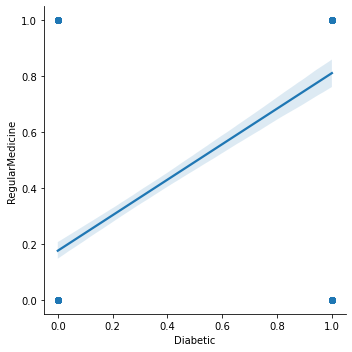

In [ ]:
y = diabetes_clean_df.Diabetic
x = diabetes_clean_df.RegularMedicine
correlationDRM = y.corr(x)
correlationDRM
# sns.scatterplot(x='Diabetic', y='RegularMedicine', data=diabetes_clean_df)
sns.lmplot(x='Diabetic', y='RegularMedicine', data=diabetes_clean_df)
# sns.lmplot(x="FlyAsh", y="Strength", data=con)

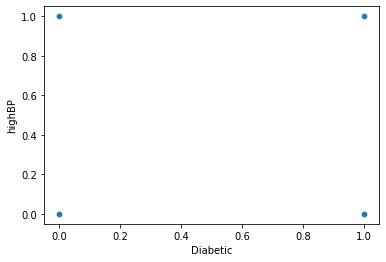

In [ ]:
y = diabetes_clean_df.Diabetic
x = diabetes_clean_df.highBP
correlationDBP = y.corr(x)
correlationDBP
sns.scatterplot(x='Diabetic', y='highBP', data=diabetes_clean_df)

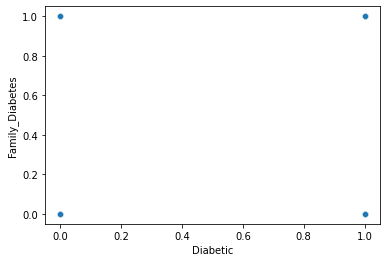

In [ ]:
# y = diabetes_clean_df.Diabetic
# x = diabetes_clean_df.Family_Diabetes
# correlationDFD = y.corr(x)
# correlationDFD
sns.scatterplot(x='Diabetic', y='Family_Diabetes', data=diabetes_clean_df)
# sns.lmplot(x, y, data=diabetes_clean_df)

In [ ]:
import seaborn as sns

In [ ]:
cormat = diabetes_clean_df.corr()
round(cormat,2)

,Gender,Family_Diabetes,highBP,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,Pregancies,Pdiabetes,Diabetic
Gender,1.00,0.10,-0.03,0.12,-0.29,-0.32,0.07,-0.02,0.13,-0.07,0.10,0.48,0.14,0.04
Family_Diabetes,0.10,1.00,0.07,0.11,-0.02,0.03,0.05,0.06,0.18,0.01,0.06,0.10,0.02,0.26
highBP,-0.03,0.07,1.00,0.15,-0.01,0.11,-0.07,-0.13,0.45,-0.11,0.18,0.05,0.03,0.37
BMI,0.12,0.11,0.15,1.00,-0.01,-0.01,-0.07,-0.30,0.18,-0.04,0.07,-0.06,0.10,0.12
Smoking,-0.29,-0.02,-0.01,-0.01,1.00,0.51,-0.02,-0.00,-0.04,0.27,0.15,-0.13,-0.02,-0.01
Alcohol,-0.32,0.03,0.11,-0.01,0.51,1.00,-0.01,0.07,0.07,0.12,0.17,-0.18,-0.06,0.07
Sleep,0.07,0.05,-0.07,-0.07,-0.02,-0.01,1.00,0.53,-0.10,0.04,0.00,0.04,0.08,-0.07
SoundSleep,-0.02,0.06,-0.13,-0.30,-0.00,0.07,0.53,1.00,-0.11,-0.10,-0.06,0.16,0.03,0.00
RegularMedicine,0.13,0.18,0.45,0.18,-0.04,0.07,-0.10,-0.11,1.00,-0.12,0.25,0.19,0.00,0.60
JunkFood,-0.07,0.01,-0.11,-0.04,0.27,0.12,0.04,-0.10,-0.12,1.00,0.16,-0.03,0.14,-0.06


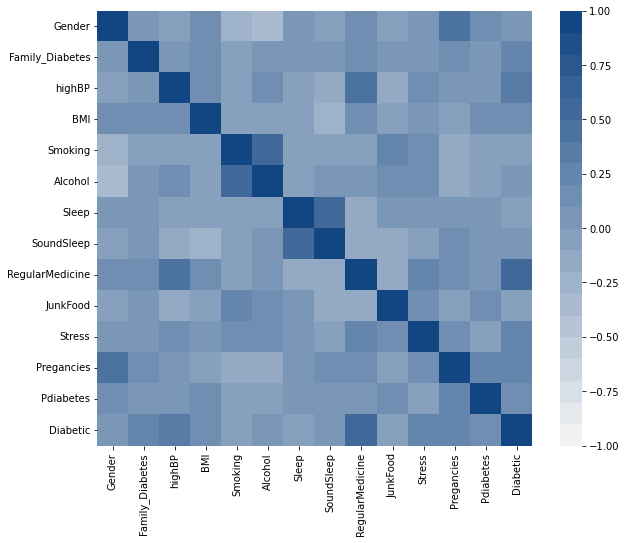

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = diabetes_clean_df.corr()
sns.heatmap(corr, 
    cmap=sns.color_palette("light:#124683", n_colors=20),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [ ]:
# diabetic_df.to_csv('diab_clean.csv', encoding='utf-8', index=False)
diabetic_clean_df = pd.read_csv('diab_clean_try.csv')
diabetic_clean_df['Diabetic'] = diabetic_clean_df['Diabetic'].fillna(1)
# print(diabetic_clean_df.info())
# print(diabetic_clean_df.corr())


# not_diabetic_df.to_csv('not_diab_clean.csv', encoding='utf-8', index=False)
not_diabetic_clean_df = pd.read_csv('not_diab_clean.csv')
not_diabetic_clean_df['Diabetic'] = not_diabetic_clean_df['Diabetic'].fillna(0)

In [ ]:
frames = [diabetic_clean_df, not_diabetic_clean_df]
diabetes_clean_df = pd.concat(frames)
diabetes_clean_df.to_csv('diabetes_clean_df.csv', encoding='utf-8', index=False)

In [ ]:
# Replacing in col 'Age' less than 40 with 0-40
diabetes_clean_df['Age'].replace('less than 40','0,40', inplace=True)
# Replacing in col 'Age' 40-49 with 40,49
diabetes_clean_df['Age'].replace('40-49','40,49', inplace=True)
# Replacing in col 'Age' 50-59 with 50,59
diabetes_clean_df['Age'].replace('50-59','50,59', inplace=True)
# Replacing in col 'Gender' Female with 1
diabetes_clean_df['Age'].replace('60 or older','60,99', inplace=True)
print(diabetes_clean_df['Age'].unique())

['40,49' '0,40' '60,99' '50,59']


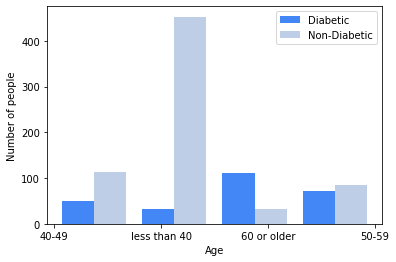

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist([diabetes_clean_df.Age, not_diabetic_clean_df.Age], 
          label=['Diabetic', 'Non-Diabetic'], 
          color=['#4287f5', '#becee6'], 
          bins=4
)
ax.set_xlabel("Age")
ax.set_ylabel("Number of people")
plt.legend(loc='upper right')

## Corr

In [ ]:
diab_df['Diabetic'] = diab_df['Diabetic'].fillna(1)

In [ ]:
diab_df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,40-49,0,0,1,none,21.0,0,1,10,10,0,0,1,high,0.0,0,not much,1
1,0-40,1,1,0,one hr or more,24.0,0,0,4,4,1,1,3,normal,3.0,0,quite often,1
2,0-40,1,1,0,one hr or more,24.0,0,0,4,4,1,1,3,normal,3.0,0,not much,1
3,60-99,1,0,0,none,18.0,0,0,6,6,1,0,1,normal,3.0,0,quite often,1
4,60-99,0,0,1,none,26.0,0,0,4,4,1,0,0,high,0.0,0,not much,1


In [ ]:
# diab_df.corr()

,Gender,Family_Diabetes,highBP,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,Pregancies,Pdiabetes,Diabetic
Gender,1.000000,0.134542,0.032559,0.035957,-0.297608,-0.483997,-0.026538,-0.155073,0.213930,-0.002230,0.266497,0.682192,0.256525,NaN
Family_Diabetes,0.134542,1.000000,-0.040155,0.221126,0.212827,-0.026318,-0.052980,-0.146386,0.065314,0.250970,0.161660,0.117147,-0.007654,NaN
highBP,0.032559,-0.040155,1.000000,0.004606,0.064411,-0.002317,0.030650,-0.041542,0.303195,-0.119299,0.109741,0.047701,-0.033834,NaN
BMI,0.035957,0.221126,0.004606,1.000000,0.147827,0.054143,-0.053668,-0.356631,0.047306,0.373200,0.109551,-0.125547,0.199480,NaN
Smoking,-0.297608,0.212827,0.064411,0.147827,1.000000,0.502518,-0.272046,-0.184510,0.014573,0.425164,0.032878,-0.206832,-0.076344,NaN
Alcohol,-0.483997,-0.026318,-0.002317,0.054143,0.502518,1.000000,-0.038713,-0.045474,0.050755,0.174884,0.133131,-0.321703,-0.124157,NaN
Sleep,-0.026538,-0.052980,0.030650,-0.053668,-0.272046,-0.038713,1.000000,0.635617,-0.150809,-0.201556,-0.112719,0.024318,0.130893,NaN
SoundSleep,-0.155073,-0.146386,-0.041542,-0.356631,-0.184510,-0.045474,0.635617,1.000000,-0.363575,-0.290681,-0.179216,0.124130,0.073383,NaN
RegularMedicine,0.213930,0.065314,0.303195,0.047306,0.014573,0.050755,-0.150809,-0.363575,1.000000,-0.078333,0.243383,0.074863,-0.219679,NaN
JunkFood,-0.002230,0.250970,-0.119299,0.373200,0.425164,0.174884,-0.201556,-0.290681,-0.078333,1.000000,0.151715,-0.007589,0.291775,NaN


# Predictive

## Pairplot

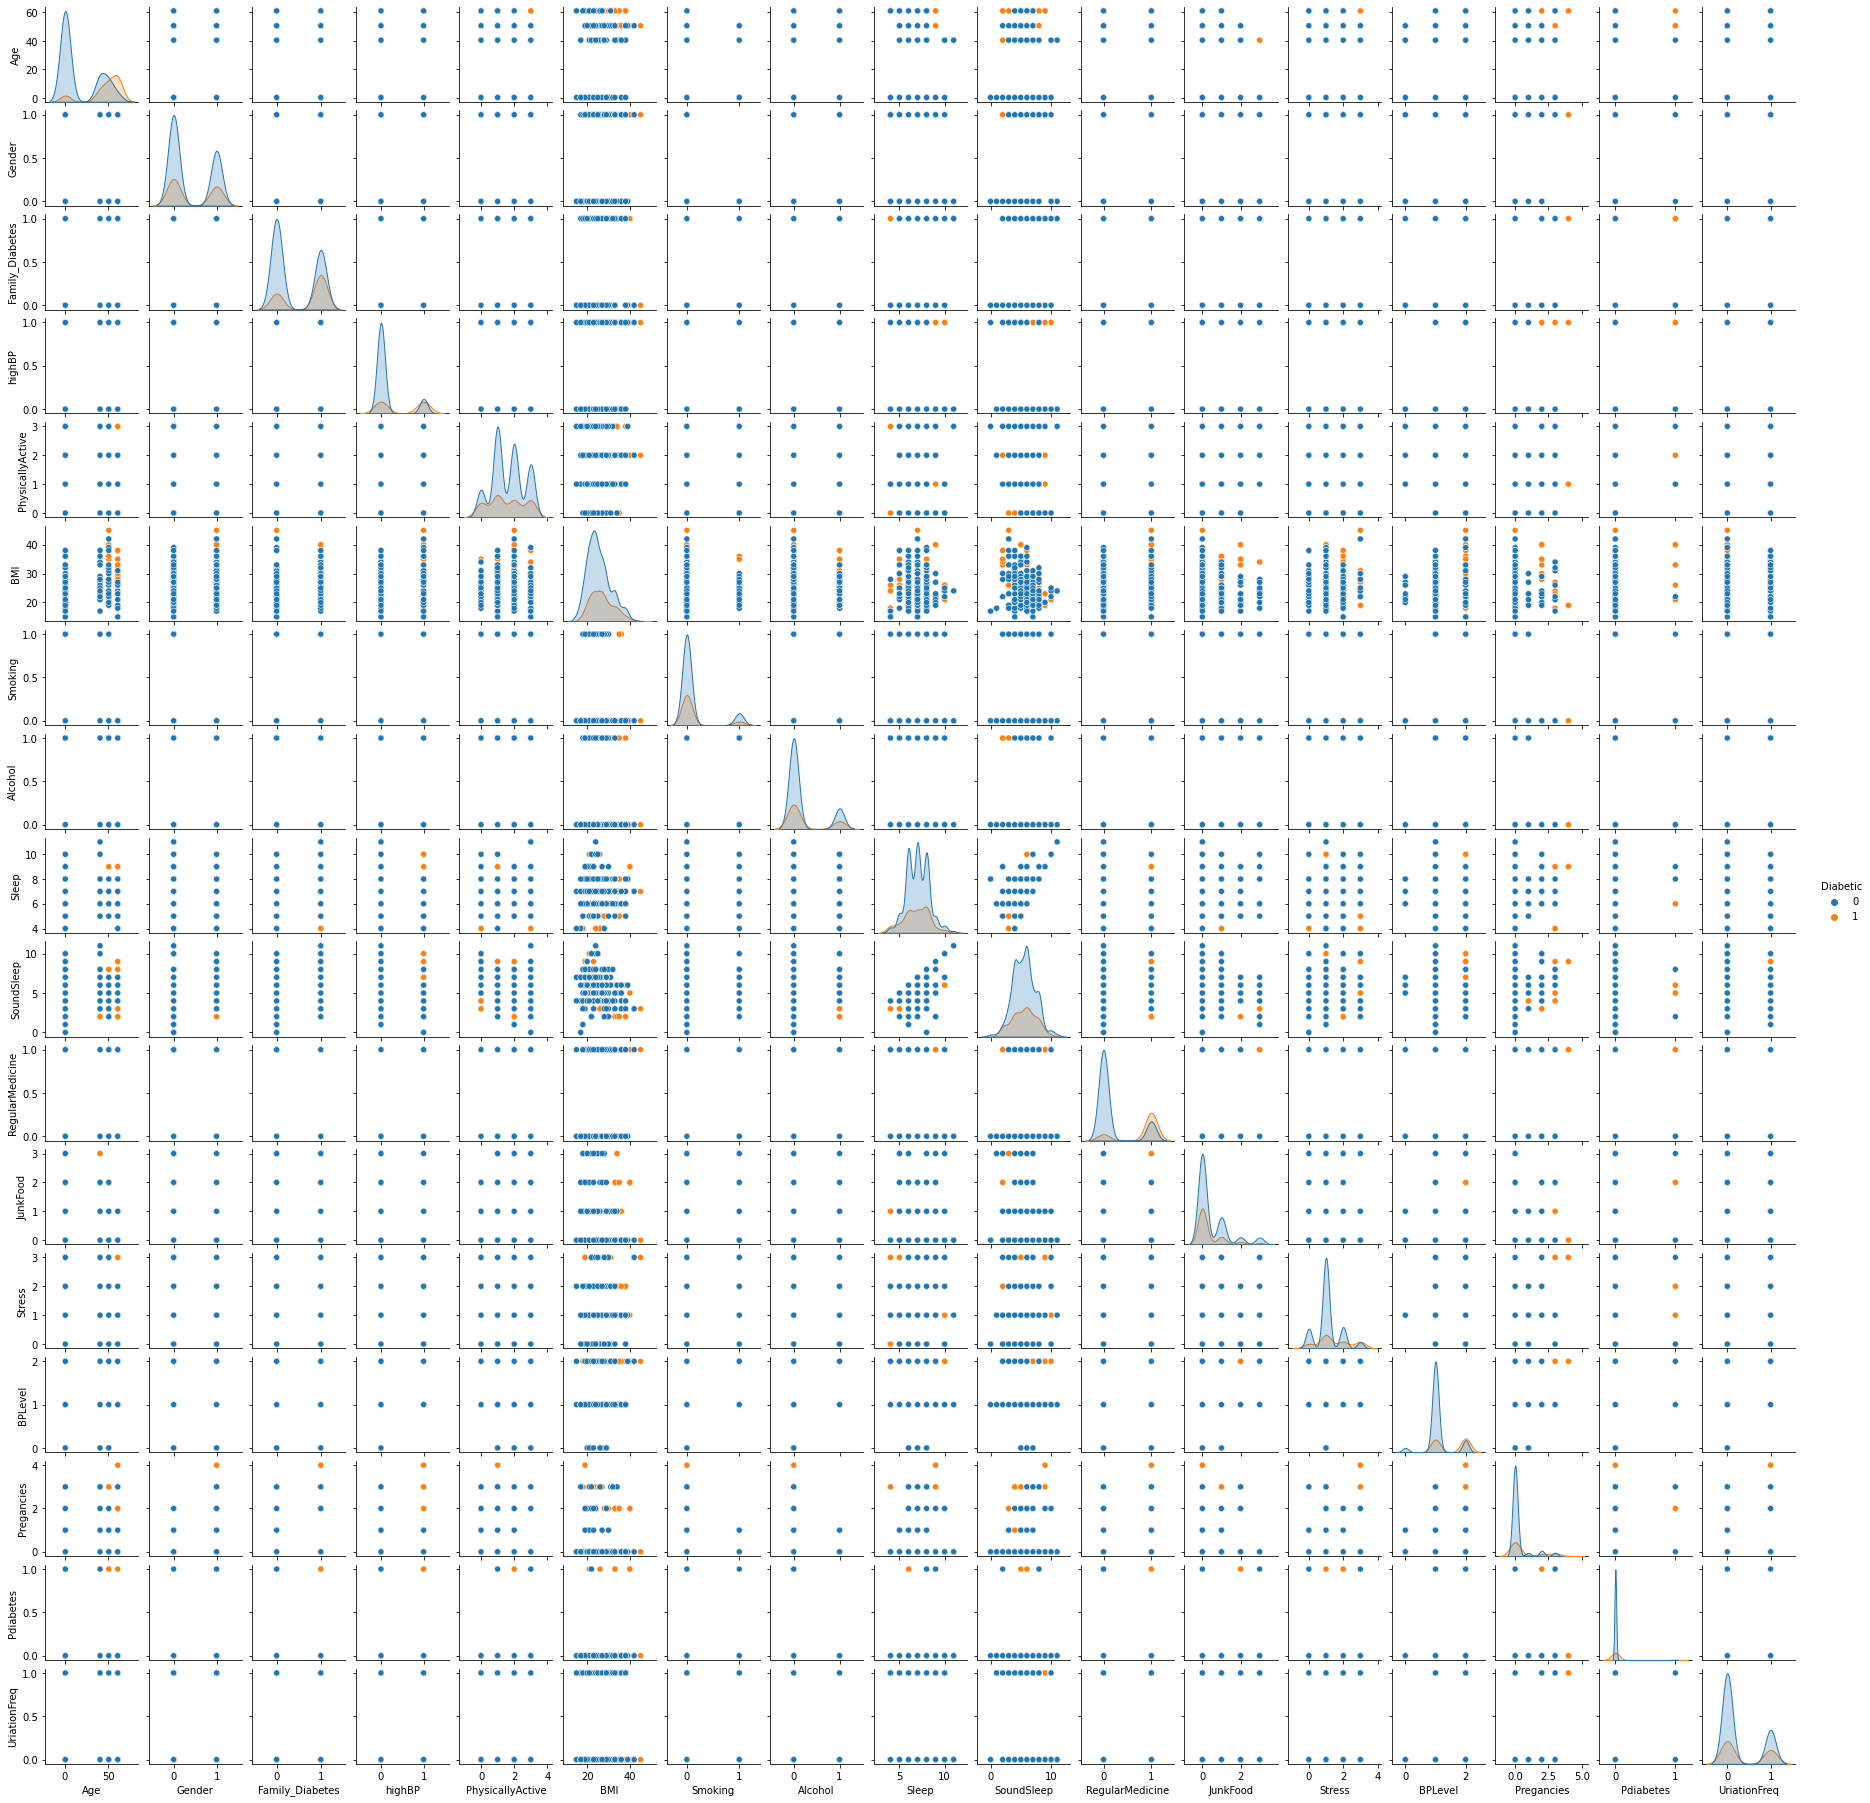

In [ ]:
sns.pairplot(diabetes_clean_df, hue='Diabetic', height=1.5)

## split

In [ ]:
y_diab = diabetes_clean_df['Diabetic']
x_diab = diabetes_clean_df.drop(['Diabetic'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_diab, y_diab, test_size=0.2, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
sum(y_pred == y_test) / len(y_test)

0.8578947368421053

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred, y_test)

0.8578947368421053

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.9631578947368421

In [ ]:
accuracies = []
for random_state in [1, 23, 42, 15, 56]:
    x_train, x_test, y_train, y_test = train_test_split(x_diab, y_diab, test_size=0.2, random_state=random_state)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_pred, y_test))

In [ ]:
sum(accuracies) / len(accuracies)

0.9536842105263158

In [ ]:
accuracies

[0.9736842105263158,
 0.9473684210526315,
 0.9421052631578948,
 0.968421052631579,
 0.9368421052631579]

# scatterplot

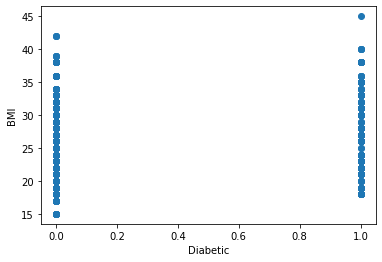

In [ ]:
# create the scatterplot
plt.scatter(diabetes_clean_df["Diabetic"], diabetes_clean_df["BMI"])

# label the axes
plt.xlabel("Diabetic")
plt.ylabel("BMI")

# show the plot
plt.show()

# regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = diabetes_clean_df.drop("Diabetic", axis=1)
y = diabetes_clean_df["Diabetic"]

# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# scaler = StandardScaler()
x_train = x_train.reshape(1,-1)
model = LinearRegression()

AttributeError: ignored

# plot age

In [ ]:
not_diabetic_clean_df['Age'].value_counts()

0-40     453
40-49    114
50-59     84
60-99     32
Name: Age, dtype: int64

In [ ]:
diabetic_clean_df = pd.read_csv('diab_clean.csv') #diab_clean_try

In [ ]:
diabetic_clean_df['Age'].value_counts()

60-99    112
50-59     71
40-49     50
0-40      32
Name: Age, dtype: int64

In [ ]:
not_diabetic_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               683 non-null    object 
 1   Gender            683 non-null    int64  
 2   Family_Diabetes   683 non-null    int64  
 3   highBP            683 non-null    int64  
 4   PhysicallyActive  683 non-null    int64  
 5   BMI               683 non-null    float64
 6   Smoking           683 non-null    int64  
 7   Alcohol           683 non-null    int64  
 8   Sleep             683 non-null    int64  
 9   SoundSleep        683 non-null    int64  
 10  RegularMedicine   683 non-null    int64  
 11  JunkFood          683 non-null    int64  
 12  Stress            683 non-null    int64  
 13  BPLevel           683 non-null    int64  
 14  Pregancies        683 non-null    float64
 15  Pdiabetes         683 non-null    int64  
 16  UriationFreq      683 non-null    int64  
 1

# note

In [ ]:
diab_df.BMI.value_counts()

24.0    30
21.0    29
26.0    27
28.0    25
27.0    21
23.0    19
33.0    18
30.0    13
35.0    12
22.0    12
38.0     8
18.0     8
31.0     8
19.0     7
20.0     5
32.0     5
40.0     4
34.0     4
36.0     4
29.0     3
25.0     2
45.0     1
Name: BMI, dtype: int64

In [ ]:
not_diab_df.BMI.value_counts()

24.0    81
21.0    59
23.0    57
22.0    46
33.0    46
28.0    46
20.0    43
27.0    42
26.0    39
25.0    32
19.0    29
29.0    25
18.0    24
30.0    20
38.0    20
36.0    16
17.0    16
32.0    11
31.0     8
34.0     8
15.0     8
39.0     4
42.0     3
Name: BMI, dtype: int64

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


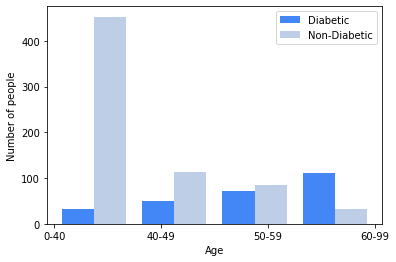

In [ ]:
# sort the dataframe by the age column
diab_df = diab_df.sort_values(by='Age')
not_diab_df = not_diab_df.sort_values(by='Age')

# plot the histogram
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist([diab_df.Age, not_diab_df.Age], 
    label=['Diabetic', 'Non-Diabetic'], 
    color=['#4287f5', '#becee6'], 
    bins=len(diab_df['Age'].unique())
)
ax.set_xlabel("Age")
ax.set_ylabel("Number of people")

# set the x-axis labels to the unique values in the age column
ax.set_xticks(diab_df['Age'].unique())
ax.set_xticklabels(diab_df['Age'].unique())

plt.legend(loc='upper right')
plt.show()

In [ ]:
not_diab_df.head(15)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
288,0-40,1,1,0,1,33.0,0,0,6,4,0,0,2,1,0.0,0,1,0
377,0-40,0,0,0,1,29.0,1,1,6,5,1,1,2,1,0.0,0,0,0
376,0-40,0,0,0,0,18.0,1,1,7,6,0,0,2,1,0.0,0,0,0
375,0-40,0,0,0,2,30.0,1,1,5,5,1,1,0,1,1.0,0,0,0
374,0-40,0,0,0,2,26.0,1,1,8,6,0,0,1,1,0.0,0,0,0
616,0-40,1,0,0,2,28.0,0,0,6,5,0,0,1,1,0.0,0,0,0
368,0-40,0,1,0,1,21.0,0,0,6,6,0,0,0,1,0.0,0,0,0
367,0-40,0,1,0,2,36.0,0,0,6,4,0,0,1,1,0.0,0,0,0
363,0-40,1,0,0,3,32.0,0,0,8,8,1,0,1,1,3.0,0,0,0
360,0-40,1,0,0,3,20.0,0,0,6,6,0,2,0,1,0.0,0,0,0


In [ ]:
# LOGISTIC

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# divide the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(diabetes_clean_df.drop(["Diabetic"], axis=1), diabetes_clean_df["Diabetic"], test_size=0.2)

# define the features and the target variable
features = ["Gender","Family_Diabetes","highBP","PhysicallyActive","BMI","Pdiabetes","UriationFreq"] #"Smoking","Alcohol","Sleep","SoundSleep","RegularMedicine","JunkFood","Stress","BPLevel","Pregancies",
target = "Diabetic"

# fit the model
log_reg = LogisticRegression()
log_reg.fit(x_train[features], y_train)

# predict the target variable for the test data
y_pred = log_reg.predict(x_test[features])

# measure the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)

Accuracy:  0.7894736842105263
Precision:  0.7647058823529411
Recall:  0.2653061224489796


# boxplot


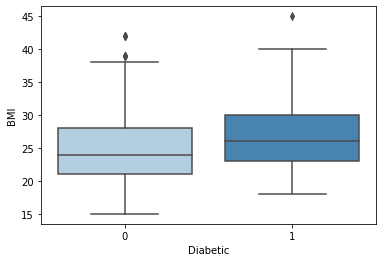

In [ ]:
diabetes_clean_df.head()

sns.boxplot(x=diabetes_clean_df["Diabetic"], y=diabetes_clean_df["BMI"], palette="Blues")

plt.show()



[0.67, 0.6, 0.53, 0.51, 0.48]


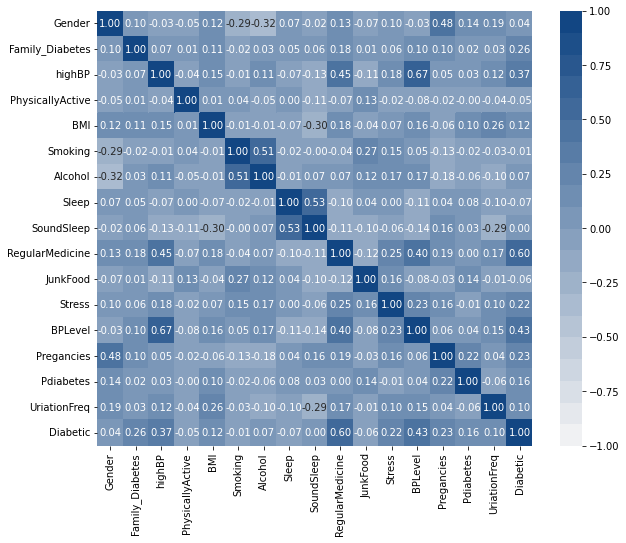

In [ ]:
import heapq
fig, ax = plt.subplots(figsize=(10, 8))
corr = diabetes_clean_df.corr()
sns.heatmap(corr, 
    cmap=sns.color_palette("light:#124683", n_colors=20),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax,
    annot=True, fmt=".2f")

# show the 5 highest_values (excluding 1 and duplicates)
highest_values = [float(item.get_text()) for item in ax.texts]
filtered_highest_values = [val for val in highest_values if val != 1]
unique_highest_values = set(filtered_highest_values)
top_5_highest_values = heapq.nlargest(5, unique_highest_values)

print(top_5_highest_values)
plt.show()